In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('melb_data.csv')

In [17]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Nomor 1

In [19]:
statistics = df[['Rooms', 'Distance', 'Landsize', 'Price']].describe()
(statistics)

,Rooms,Distance,Landsize,Price
count,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,10.137776,558.416127,1.075684e+06
std,0.955748,5.868725,3990.669241,6.393107e+05
min,1.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.100000,177.000000,6.500000e+05
50%,3.000000,9.200000,440.000000,9.030000e+05
75%,3.000000,13.000000,651.000000,1.330000e+06
max,10.000000,48.100000,433014.000000,9.000000e+06


# Nomor 2

### a

In [31]:
rumah_paling_mahal = df[df['Price'] == df['Price'].max()]
jumlah_rooms_rumah_paling_mahal = rumah_paling_mahal['Rooms'].values[0]
(jumlah_rooms_rumah_paling_mahal)

3

### b

In [32]:
rumah_terdekat_ke_CBD = df[df['Distance'] == df['Distance'].min()]
rata_rata_harga_rumah_terdekat = rumah_terdekat_ke_CBD['Price'].mean()
(rata_rata_harga_rumah_terdekat)


671166.6666666666

### c

In [33]:
southern_metropolitan_data = df[df['Regionname'] == 'Southern Metropolitan']
price_range_southern_metropolitan = southern_metropolitan_data['Price'].max() - southern_metropolitan_data['Price'].min()
(price_range_southern_metropolitan)

7869000.0

# Nomor 3

### a

In [34]:
harga_rumah = df["Price"]
# Q1
q1 = harga_rumah.quantile(0.25)
# Q2
q2 = harga_rumah.median()
# Q3
q3 = harga_rumah.quantile(0.75)
# IQR
iqr = q3 - q1

In [35]:
print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("IQR:",iqr)

Q1: 650000.0
Q2: 903000.0
Q3: 1330000.0
IQR: 680000.0


### b

In [36]:
# Nilai outlier
outliers = harga_rumah.where((harga_rumah < q1 - (1.5 * iqr)) | (harga_rumah > q3 + (1.5 * iqr))).dropna()

In [37]:
# Jumlah outlier
jumlah_outliers = outliers.shape[0]
print("Jumlah outlier:", jumlah_outliers)

Jumlah outlier: 612


# Nomor 4

In [38]:
from scipy import stats
#Uji Shapiro-Wilk:
price_data = df['Price']

# Uji Shapiro-Wilk
shapiro_test_statistic, shapiro_p_value = stats.shapiro(price_data)

# Interpretasi hasil uji Shapiro-Wilk
alpha = 0.05
if shapiro_p_value > alpha:
    print("Data tidak terdistribusi secara signifikan dari distribusi normal (tidak menolak H0)")
else:
    print("Data terdistribusi secara signifikan dari distribusi normal (menolak H0)")

# Ekstrak kolom 'Price' untuk pengujian normalitas
price_data = df['Price']

# Uji D'Agostino and Pearson's
dagostino_test_statistic, dagostino_p_value = stats.normaltest(price_data)

# Interpretasi hasil uji D'Agostino and Pearson's
alpha = 0.05
if dagostino_p_value > alpha:
    print("Data tidak terdistribusi secara signifikan dari distribusi normal (tidak menolak H0)")
else:
    print("Data terdistribusi secara signifikan dari distribusi normal (menolak H0)")

Data terdistribusi secara signifikan dari distribusi normal (menolak H0)
Data terdistribusi secara signifikan dari distribusi normal (menolak H0)


/home/algo/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Nomor 5

In [20]:
correlation = df['Rooms'].corr(df['Price'])

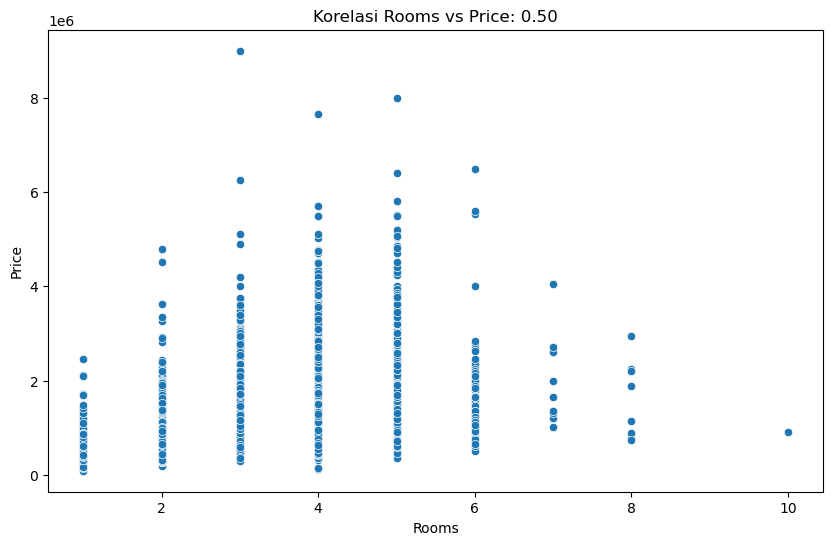

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rooms', y='Price', data=df)
plt.title(f'Korelasi Rooms vs Price: {correlation:.2f}')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

# Nomor 6

In [26]:
# Mencari daftar Regionname yang unik
unique_regions = df['Regionname'].unique()

In [25]:
# Inisialisasi variabel untuk menyimpan korelasi terkuat dan nama Regionname
strongest_corr = 0
strongest_region = None

In [27]:
# Iterasi melalui setiap Regionname dan menghitung korelasi
for region in unique_regions:
    region_data = df[df['Regionname'] == region]
    correlation = np.corrcoef(region_data['Rooms'], region_data['Price'])[0, 1]

In [28]:
    # Jika korelasi lebih kuat dari yang sebelumnya, perbarui variabel
    if abs(correlation) > abs(strongest_corr):
        strongest_corr = correlation
        strongest_region = region

In [29]:
# Hasil korelasi terkuat dan nama Regionname
print(f"Regionname dengan korelasi terkuat antara Rooms dan Price: {strongest_region}")
print(f"Korelasi terkuat: {strongest_corr:.2f}")

Regionname dengan korelasi terkuat antara Rooms dan Price: Western Victoria
Korelasi terkuat: 0.55


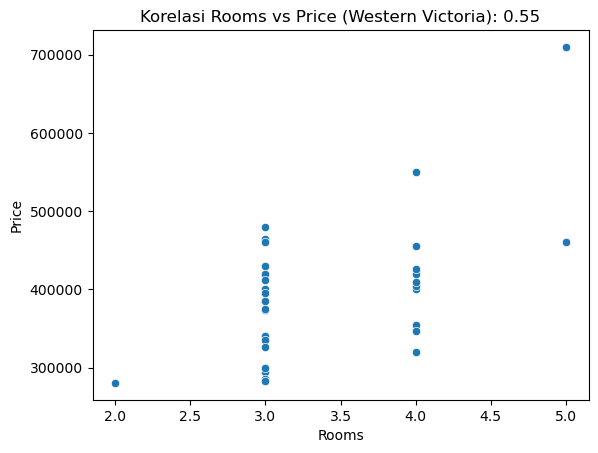

In [30]:
strongest_region_data = df[df['Regionname'] == strongest_region]
sns.scatterplot(x='Rooms', y='Price', data=strongest_region_data)
plt.title(f'Korelasi Rooms vs Price ({strongest_region}): {strongest_corr:.2f}')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

# Nomor 9